Elaborado por [Juan Galvis](https://scholar.google.com/citations?user=lbfc2joAAAAJ&hl=en).

# Introducción  
Para optimizar el valor de los parámetros del modelo creamos una función que calcule el **tamaño** del desajuste a los datos de los posibles modelos. Esta función recive los datos y valores válidos de parámetros del modelo y retorna la norma del residuo. Podemos usar por ejemplo la medida de desajuste de mínimos cuadrados (norma Euclidiana). Luego usamos una librería de optimización para calcular el valor del parámetro óptimo aproximado.
 
Consideremos el ejemplo siguiente donde tenemos datos del crecimiento de un tumor en ratones. 
Los datos son tomados (y mas información) se encuentran en: 
Modeling Cancer Growth with Differential Equations de Jue Wang, Department of Mathematics
Union College, Schenectady NY 12308 USA.
 
Para ilustrar el procedimiento, ajustaremos dos modelos:
1. Un modelo polinomial de grado uno
2. Un modelo polinomial cúbico
3. Un modelo de redes neuronales artificiales
4. Un modelo de ecuaciones diferenciales (Modelo de von Bertalanffy).


# Prerrequisitos y datos

In [1]:
using Plots
using LinearAlgebra

In [2]:
# Datos tomados del documento,  
#Modeling Cancer Growth with Differential Equations
# de Jue Wang, Department of Mathematics
#Union College, Schenectady NY 12308 USA
#wangj@union.edu

Datos=[
3.46	0.0158
4.58	0.0264
5.67	0.0326
6.64	0.0445
7.63	0.0646
8.41	0.0933
9.32	0.1454
10.27	0.2183
11.19	0.2842
12.39	0.4977
13.42	0.6033
15.19	0.8441
16.24	1.2163
17.23	1.447
18.18	2.3298
19.29	2.5342
21.23	3.0064
21.99	3.4044
24.33	3.2046
25.58	4.5241
26.43	4.3459
27.44	5.1374
28.43	5.5376
30.49	4.8946
31.34	5.066
32.34	6.1494
33.00	6.8548
35.20	5.9668
36.34	6.6945
37.29	6.6395
38.50	6.8971
39.67	7.2966
41.37	7.2268
42.58	6.8815
45.39	8.0993
46.38	7.2112
48.29	7.0694
49.24	7.4971
50.19	6.9974
51.14	6.7219
52.10	7.0523
54.00	7.1095
56.33	7.0694
57.33	8.0562
59.38	7.2268];

tiempo=Datos[:,1];
volumen=Datos[:,2];
Datos

45×2 Matrix{Float64}:
  3.46  0.0158
  4.58  0.0264
  5.67  0.0326
  6.64  0.0445
  7.63  0.0646
  8.41  0.0933
  9.32  0.1454
 10.27  0.2183
 11.19  0.2842
 12.39  0.4977
 13.42  0.6033
 15.19  0.8441
 16.24  1.2163
  ⋮     
 42.58  6.8815
 45.39  8.0993
 46.38  7.2112
 48.29  7.0694
 49.24  7.4971
 50.19  6.9974
 51.14  6.7219
 52.1   7.0523
 54.0   7.1095
 56.33  7.0694
 57.33  8.0562
 59.38  7.2268

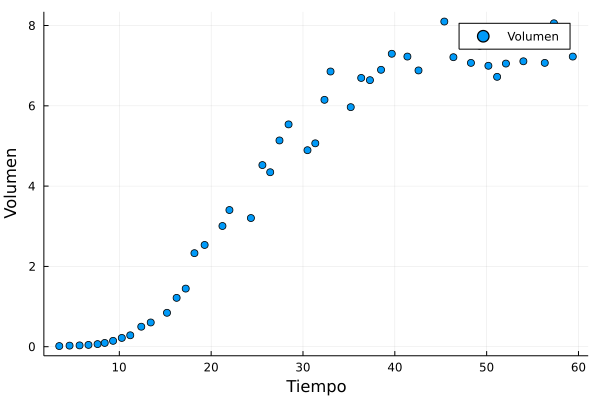

In [3]:
scatter(tiempo,volumen,ls=:dash,label="Volumen",lw=4, xlabel = "Tiempo",yaxis="Volumen")

# Modelo polinomio grado 1
El modelo cúbico asumimos que 
$$
V(t) \approx a+bt
$$
y queremos estimar $a,b,c$ y $d$.

Creamos una función que mida la norma del residuo, o sea, el tamaño del desajuste (o tamaño del residuo) del modelo polinomial cúbico con respecto a los datos usando, por ejemplo, mínimos cuadrados, es decir, la norma euclidiana de la diferencia o residuo.

In [4]:
function residuoPL(par,V,tiempo)
  a,b=par
  oneaux=fill(1,size(tiempo))
  Vmodelo=a*oneaux+b*tiempo
  res=V-Vmodelo
  nres=norm(res)
return nres
end

residuoPL (generic function with 1 method)

Por ejemplo, el desajuste de usar $a=1$ y $b=2$, es defir, aproximar $V(t)≈1+2t$ es $\approx 424.31$ que es calculado a continuación.

In [5]:
residuoPL([1,2],volumen,tiempo)

424.30491196513384

Ahora usamos una librería de optimización para calcular el valor del parámetro óptimo aproximado.

In [6]:
using Optim

Definimos una función que dependa únicamente de la varible de desición de la optimización.

In [7]:
rPL(par) = residuoPL(par, volumen, tiempo)

rPL (generic function with 1 method)

Procedemos a realizar la optimización. Usamos el comando optimize.

In [8]:
oL =Optim.optimize(rPL, [3.0, 5.0], LBFGS())

 * Status: success

 * Candidate solution
    Final objective value:     6.307243e+00

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 2.77e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.95e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 8.34e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.32e-08 ≰ 0.0e+00
    |g(x)|                 = 7.04e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    10
    f(x) calls:    32
    ∇f(x) calls:   32


Podemos obtener información sobre los valor optimo numérico encontrado y los puntos optimo de la siguiente forma. 

In [9]:
oL.minimizer

2-element Vector{Float64}:
 -0.7019590739353502
  0.16773981105037802

In [10]:
oL.minimum

6.307243158161172

Vemos entonces que el modelo lineal optimo (econtrado numéricamente) es 
$$
V(t) \approx -0.70+0.16t
$$

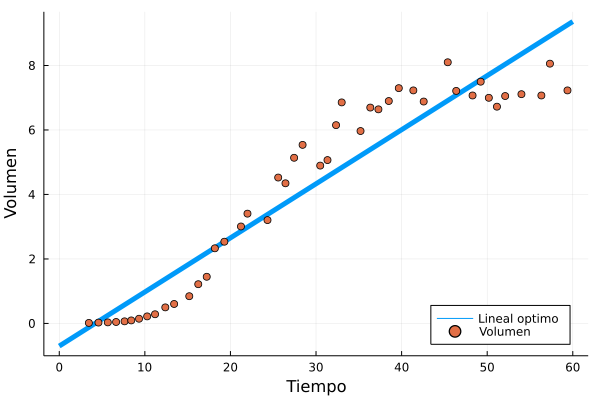

In [11]:
ts=0:0.1:60
oneaux=fill(1,size(ts))

VolumenPL=oL.minimizer[1]*oneaux+oL.minimizer[2]*ts
plot(ts,VolumenPL,lw=5,label="Lineal optimo")
scatter!(tiempo,volumen,ls=:dash,label="Volumen",lw=4, xlabel = "Tiempo",yaxis="Volumen",legend=:bottomright)

# Modelo polinomio cúbico 

El modelo cúbico asumimos que 
$$
V(t) \approx a+bt+ct^2+dt^3
$$
y queremos estimar $a,b,c$ y $d$.

Creamos una función que mida la norma del residuo, o sea, el tamaño del desajuste (o tamaño del residuo) del modelo polinomial cúbico con respecto a los datos usando, por ejemplo, mínimos cuadrados, es decir, la norma euclidiana de la diferencia o residuo.

In [12]:
function residuoPC(par,V,t)
  a,b,c,d=par
  oneaux=fill(1,size(tiempo))
  Vmodelo=a*oneaux+b*t+c*t.^2+d*t.^3
  res=V-Vmodelo
  nres=norm(res)
return nres
end

residuoPC (generic function with 1 method)

In [13]:
rPC(par) = residuoPC(par, volumen, tiempo)

rPC (generic function with 1 method)

In [14]:
oC=Optim.optimize(rPC, [.1,.01,.01,0.001],NelderMead() )

 * Status: success

 * Candidate solution
    Final objective value:     3.241223e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    446
    f(x) calls:    762


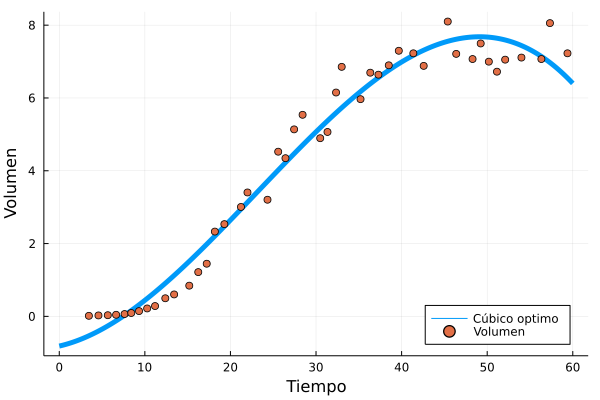

In [15]:
ts=0:0.1:60
oneaux=fill(1,size(ts))
oCm=oC.minimizer
VolumenPC=oCm[1]*oneaux+oCm[2]*ts+oCm[3]*ts.^2+oCm[4]*ts.^3
plot(ts,VolumenPC,lw=5,label="Cúbico optimo")
scatter!(tiempo,volumen,ls=:dash,label="Volumen",lw=4, xlabel = "Tiempo",yaxis="Volumen",legend=:bottomright)

# Modelo de redes neuronales artificiales


El modelo cúbico asumimos que 
$$
V(t) \approx a\frac{1}{1+e^{bt+ c}}+d\frac{1}{1+e^{ft+g}}
$$
y queremos estimar $a,b,c,d,f$ y $g$.

Creamos una función que mida la norma del residuo, o sea, el tamaño del desajuste (o tamaño del residuo) del modelo polinomial cúbico con respecto a los datos usando, por ejemplo, mínimos cuadrados, es decir, la norma euclidiana de la diferencia o residuo.

In [16]:
function residuoNN(par,V,t)
  a,b,c,d,f,g=par
  one=fill(1,size(tiempo))
  Vmodelo=a*( one./ (one+exp.(b*t+c*one)  ))+d*( one./ (one+exp.(f*t+g*one)  ))
  res=V-Vmodelo
  nres=norm(res)
return nres
end

residuoNN (generic function with 1 method)

In [17]:
rNN(par) = residuoNN(par, volumen, tiempo)

rNN (generic function with 1 method)

In [30]:
oN=Optim.optimize(rNN, [.01,.01,.01,0.001,0.001,0], BFGS())

 * Status: success

 * Candidate solution
    Final objective value:     2.523828e+00

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 7.19e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.69e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 4.44e-16 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.76e-16 ≰ 0.0e+00
    |g(x)|                 = 2.93e-10 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    46
    f(x) calls:    148
    ∇f(x) calls:   148


Note que los valores optimos son 

In [31]:
oN.minimizer

6-element Vector{Float64}:
  2.8382460307216113
  0.5403340730756686
 26.75648326728603
  7.279074135453822
 -0.1956113104455144
  4.680112856681569

Esto quiere decir, que el mejor modelo encontrado de redes neuronales artificales es
$$
V(t) \approx 2.838\frac{1}{1+e^{0.540t+ 26.756}}+7.279\frac{1}{1+e^{-0.195t+ 4.680}}.
$$

Como antes, podemos visualizar el ajuste comparandolo con los datos. Para esto tenemos, 

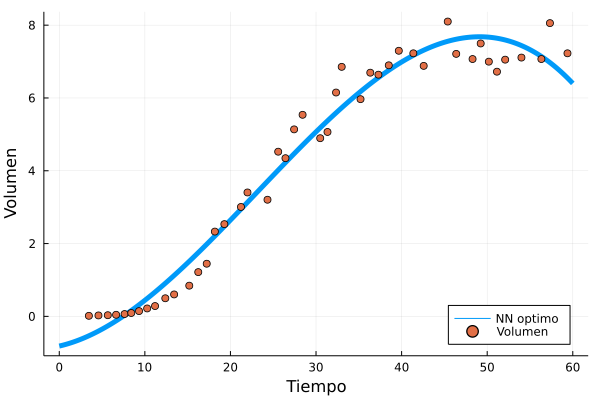

In [20]:
ts=0:0.1:60
uno=fill(1,size(ts))
oNm=oN.minimizer
VolumenNN=oNm[1]*( uno./ (uno+exp.(oNm[2]*ts+oNm[3]*uno)  ))+oNm[4]*( uno./ (uno+exp.(oNm[5]*ts+oNm[6]*uno)  ))
plot(ts,VolumenPC,lw=5,label="NN optimo")
scatter!(tiempo,volumen,ls=:dash,label="Volumen",lw=4, xlabel = "Tiempo",yaxis="Volumen",legend=:bottomright)

# Modelo de ecuaciones diferenciales
Considere el modelo de ecuaciones diferenciales, 
$$
V'= aV^\frac{2}{3}-bV,
$$
con $V_0=V(0)$ dado. La variable $V$ representa o aproxima el volumen del tumor en el tiempo $t$.

In [21]:
using DifferentialEquations

In [22]:
modeloBF(V,par,t)=par[1]*V.^(2/3)-par[2]*V

modeloBF (generic function with 1 method)

Si queremos resolver la EDO para determinados valores de los parámetros, usamos, 

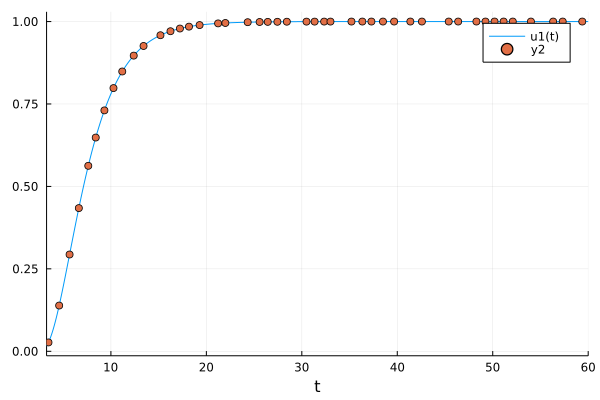

In [23]:
tspan=(3.26,60)
V0=0.0158
par=[1.0,1.0]
EDO=ODEProblem(modeloBF,V0,tspan,par)
V=solve(EDO)
plot(V)
VI=[V(t) for t in tiempo] # Evaluación de la solución en los tiempos dados (datos)
scatter!(tiempo,VI)

Ahora podemos escribir la función residuo del modelo de EDO. Es decir, cacular la norma entre el pronostico de una EDO con parametros dados y los datos. 

In [24]:
function residuoBF(par,V,t)
  
  tspan=(3.26,60)
  V0=0.0158
  EDO=ODEProblem(modeloBF,V0,tspan,par)
  VSOL=solve(EDO)
  VI=[VSOL(t) for t in tiempo]
  res=V-VI
  nres=norm(res)
return nres
end

residuoBF (generic function with 1 method)

Podemos por ejemplo, calculr el valor del residuo en $a=1,b=1$. Tenemos, 

In [25]:
 residuoBF([1 1],volumen,tiempo)

29.118598537882505

Como antes, escribimos una función solo del parámetro, 

In [26]:
rBF(par) = residuoBF(par, volumen, tiempo)

rBF (generic function with 1 method)

Y podemos optimizar el valor de los parámetros

In [27]:
oBF=Optim.optimize(rBF, [.01,.01], NelderMead())

 * Status: success

 * Candidate solution
    Final objective value:     3.619679e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    44
    f(x) calls:    89


El minimizador encontrado numéricamente es 

In [28]:
oBF.minimizer

2-element Vector{Float64}:
 0.3961748050595646
 0.19439705372221341

que da la EDO optima
$$
V'=  0.396V^\frac{2}{3}- 0.194V.
$$

Como antes, podemos visualizar el ajuste comparandolo con los datos. Para esto tenemos, 

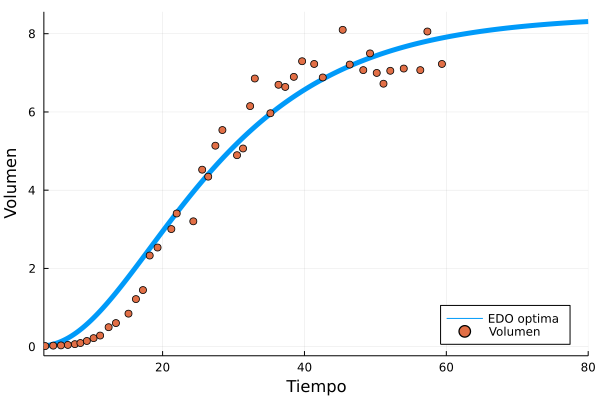

In [29]:
tspan=(3.26,80)
V0=0.0158
oBFm=oBF.minimizer
EDOoptima=ODEProblem(modeloBF,V0,tspan,oBFm)
VEDOoptima=solve(EDOoptima)
plot(VEDOoptima,lw=5,label="EDO optima")
scatter!(tiempo,volumen,ls=:dash,label="Volumen",lw=4, xlabel = "Tiempo",yaxis="Volumen",legend=:bottomright)

# Referencias

*   revision of the textbook Fundamentals of Numerical Computation by Tobin A. Driscoll and Richard J. Braun. The book was originally written for MATLAB, but this resource has been adapted to suit Julia. https://tobydriscoll.net/fnc-julia/frontmatter.html
*   Sullivan, Eric. Numerical Methods: An Inquiry-Based Approach With Python. 2020.
*   Bulirsch, Roland, Josef Stoer, and J. Stoer. Introduction to numerical analysis. Vol. 3. Heidelberg: Springer, 2002.
*  Stewart, Gilbert W. Afternotes on numerical analysis. Society for Industrial and Applied Mathematics, 1996.
*  Quarteroni, Alfio, Fausto Saleri, and Paola Gervasio. Scientific computing with MATLAB and Octave. Vol. 3. Berlin: Springer, 2006.
* Machine Learning and Data Mining
Lecture Notes, http://www.dgp.toronto.edu/~hertzman/411notes.pdf
* Deep Learning, https://www.deeplearningbook.org/lecture_slides.html

# Problemas
**1.** Considere el modelo polinomial de grado 1 y 3. Proponga un modelo polinomial de grado 4. Escriba las rutinas necesarias para optimizar los valores de los parámetros de este modelo de grado 4. Muestre el ajuste obtenido. Intente con diferentes valores iniciales de los parámetros y seleccione los valores calculados que arrojen un menor valor del residuo. Puede usar listas e índices para la identificación de los parámetros. 
 
**2.** Considere ahora el modelo de redes neuronales artificiales presentado arriba. Esta red neuronal artificial tiene una capa y dos neuronas. Agregue una tercera neurona.  Escriba las rutinas necesarias para optimizar los valores de los parámetros de este modelo con tres neuronas. Muestre el ajuste obtenido. Intente con diferentes valores iniciales de los parámetros y seleccione los valores calculados que arrojen un menor valor del residuo. Puede usar listas e índices para la identificación de los parámetros. 

**3. OPCIONAL** Considerar el modelo de ecuaciones diferenciales (Logistic Growth)
$$
V'= aV\left(1-\frac{V}{b}\right).
$$


**4** Construya, para un conjunto de datos seleccionados, un modelo que considere adecuado y ajuste los valores de los parámetros. Es decir, repita el ejercicio arriba para otro conjunto de datos. 
Puede usar librerías de aprendizaje de máquina, de interpolación o de ajustes diferentes a las mostradas en clase. Por ejemplo, puede usar los datos de la tabla anexa (https://saludata.saludcapital.gov.co/osb/index.php/datos-de-salud/enfermedades-trasmisibles/ocupacion-ucis/). 


|Fecha |Camas UCI Covid-19|
|---|---|
|1/01/2022| 222|
|2/01/2022| 209|
|3/01/2022|217|
|4/01/2022| 245|
|5/01/2022| 252|
|6/01/2022| 278|
|7/01/2022| 291|
|8/01/2022| 299|
|9/01/2022| 302|
|10/01/2022| 292|
|11/01/2022| 311|
|12/01/2022| 306|
|13/01/2022| 326|
|14/01/2022| 332|
|15/01/2022| 368|
|16/01/2022| 356|
|17/01/2022| 373|
|18/01/2022| 397|
|19/01/2022| 410|
|20/01/2022| 431|

Puede usar los modelos vistos en clase y algunos adicionales como


$$y=A\frac{1}{x}+B$$
$$y=\frac{D}{x+C}$$
$$y=\frac{x}{Ax+B}$$
$$y=Ce^{Ax}$$
$$y=Cx^A$$
$$y=(Ax+b)^{-2}$$
$$y=Cxe^{-Dx}$$
$$y=\frac{L}{1+Ce^{Ax}}$$

entre otros. O intetente modelos de ecuaciones diferenciaqles como: